In [1]:
#import necessary modules 
import sklearn
from nn import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits #import digits dataset
from sklearn.model_selection import train_test_split #to split the dataset into training, test, and validation

In [3]:
digits = load_digits() #load digits dataset
X = digits.data #extract data
X = X/np.max(X) #normalize
x, x_test, y, y_test = train_test_split (X,X, test_size=0.2, train_size=0.8 ) #split into 80% training data and 20% testing data

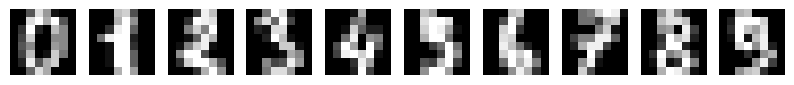

In [4]:
#visualizing the data
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(num_images, 5))

for i, ax in enumerate(axes):
    image = X[i].reshape(8, 8)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.show()

In [5]:
#define nn architecture
nn_architecture = [
    {"input_dim": 64, "output_dim": 16, "activation": "relu"},
    {"input_dim": 16, "output_dim": 64, "activation": "sigmoid"}
]

In [30]:
#Randomly chose 500 epochs
epoch = 500
batch_size = np.shape(x)[0]
autoencoder = nn.NeuralNetwork(nn_architecture, lr=0.1, seed=2, batch_size=batch_size, epochs=epoch, loss_function='mean_squared_error')

Note: My learning rate was 0.1 at first, but that led to a straight line for my loss, so I tried lr = 10.

In [34]:
#changed learning rate to 10
epoch = 500
batch_size = np.shape(x)[0]
autoencoder = nn.NeuralNetwork(nn_architecture, lr=10, seed=2, batch_size=batch_size, epochs=epoch, loss_function='mean_squared_error')

In [35]:
#train 
train_loss, val_loss = autoencoder.fit(x, y, x_test, y_test)

Text(0.5, 0, 'Epoch')

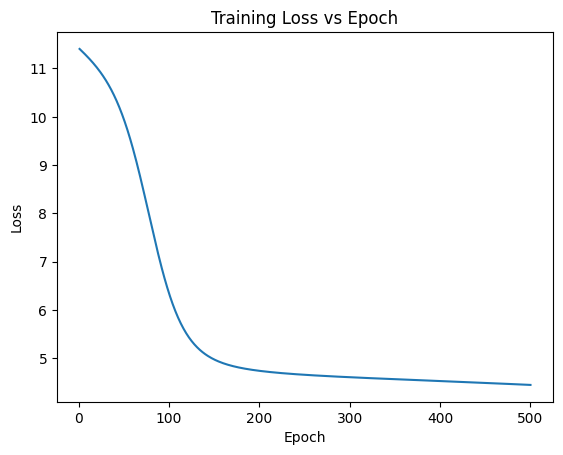

In [36]:
#plot the loss
epochs = np.arange(1,epoch+1,1)
plt.plot(epochs,train_loss,label = "Training")
plt.title("Training Loss vs Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")


Text(0.5, 0, 'Epoch')

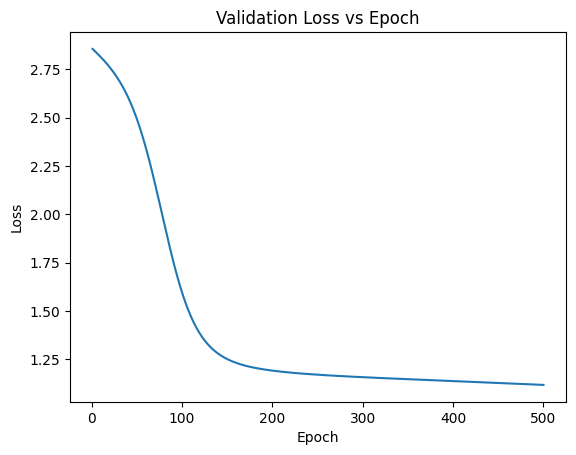

In [37]:
plt.plot(epochs,val_loss)
plt.title("Validation Loss vs Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")

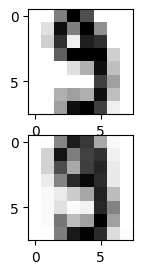

In [44]:
#visualized the prediction and realized that it doesn't look that good
#randomly chose the 9th digit ie 9
y_hat_val = autoencoder.predict(x_test)
test_image = np.reshape(x_test[9], (8,8))
pred_image = np.reshape(y_hat_val[9], (8,8))
fig, axs = plt.subplots(2, figsize=(3, 3))
axs[0].imshow(test_image, cmap=plt.cm.gray_r, interpolation="nearest")
axs[1].imshow(pred_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

However, the prediction doesn't look great. So I increased my number of epochs to 5000 and it looked a lot better.

In [39]:
#increase epoch from 500 to 5000 
epoch = 5000
autoencoder = nn.NeuralNetwork(nn_architecture, lr=10, seed=2, batch_size=batch_size, epochs=epoch, loss_function='mean_squared_error')
train_loss, val_loss = autoencoder.fit(x, y, x_test, y_test)

Text(0.5, 0, 'Epoch')

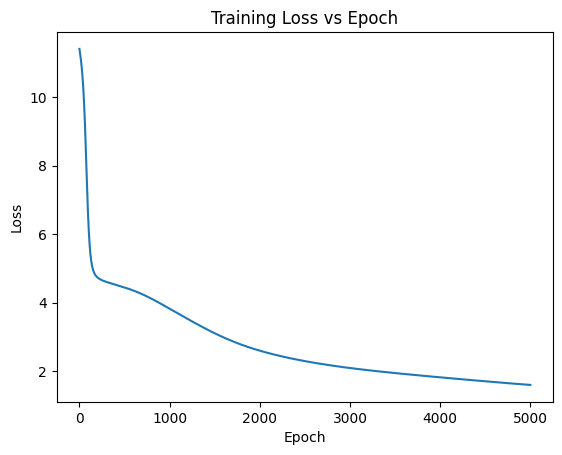

In [40]:
#plot the training loss
epochs = np.arange(1,epoch+1,1)
plt.plot(epochs,train_loss,label = "Training")
plt.title("Training Loss vs Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

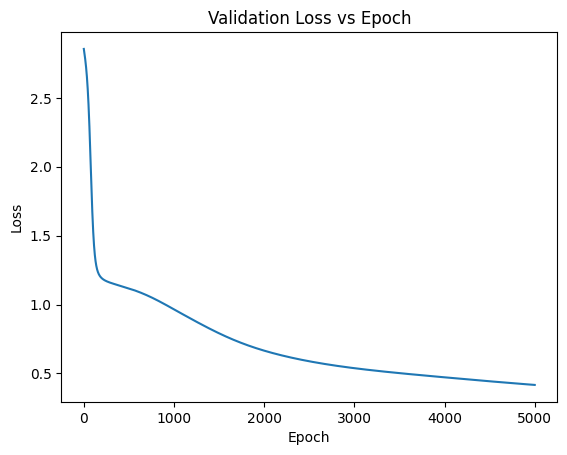

In [41]:
#plot validation loss
plt.plot(epochs,val_loss)
plt.title("Validation Loss vs Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")

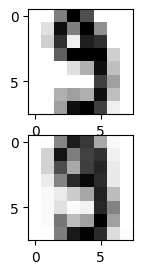

In [43]:
#looked at a prediction to visually assess how good it is
y_hat_val = autoencoder.predict(x_test)
test_image = np.reshape(x_test[9], (8,8))
pred_image = np.reshape(y_hat_val[9], (8,8))
fig, axs = plt.subplots(2, figsize=(3, 3))
axs[0].imshow(test_image, cmap=plt.cm.gray_r, interpolation="nearest")
axs[1].imshow(pred_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [48]:
#reconstruction error
diff_prediction = y_hat_val - x_test
reconstruction_error = np.absolute(np.sum(diff_prediction,axis=1,keepdims=True))
avg_reconstruction = np.mean(reconstruction_error)
print(avg_reconstruction)

2.0127866343309915


Hyperparameter selection:

I started with 500 epochs and a learning rate=0.1. However, my predictions did not look good (as described through code segments above). I then tried 500 epochs with a learning rate=10. The loss plots looked better (decline and stabilization), but the prediction was still bad. I then increased my epochs to 5000 and kept the learning rate at 10. This looked a lot better than before. I chose my hyperparameters randomly and through trial and error, and identified parameters that led to a decline (and subsequent stabilization) of loss, and also led to reasonable predictions.